## Student Performance Indicator

Life cycle of Machine Learning Project:

-- Understanding the problem statement.

-- Data Collection.

-- Data checks to perform.

-- Exploratory data analysis.

-- Data pre processing.

-- Model training.

-- Choose the best model.


## Problem Statement:-

This project understands hoe the students performance(test score) is affected by other veriables such as Gender,Ethnicity,parentall level of education,Lunch,Test prep course.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
df=pd.read_csv(r'C:\Users\DELL\Documents\python assignment\Project1.ipynb\notebook\notebook\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#shape of the dataset
df.shape

(1000, 8)

In [4]:
#checing for null values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

no null values.

In [5]:
#checking for duplicate values
df.duplicated().sum()

np.int64(0)

no duplicate values


In [6]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#checking for unique no. of values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
#finding the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# All the categories in each column:
print('Categories in gender',df['gender'].unique())
print('Categories in race_ethnicity',df['race_ethnicity'].unique())
print('Categories in parental_level_of_education ',df['parental_level_of_education'].unique())
print('Categories in lunch',df['lunch'].unique())
print('Categories in test_preparation_course ',df['test_preparation_course'].unique())

Categories in gender ['female' 'male']
Categories in race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch ['standard' 'free/reduced']
Categories in test_preparation_course  ['none' 'completed']


In [10]:
# Finding of neumerical columns and categorical columns:
neumerical_columns=[col for col in df.columns if df[col].dtypes !='object']
categorical_columns=[col for col in df.columns if df[col].dtypes == 'object']

In [11]:
print(f'we have {len(neumerical_columns)} neumerical_columns',neumerical_columns)


we have 3 neumerical_columns ['math_score', 'reading_score', 'writing_score']


In [12]:
print(f'we have {len(categorical_columns)} categorical_columns',categorical_columns)

we have 5 categorical_columns ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding columns for total and average score:-

In [19]:
# Finfing the totl number of students in each category
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average+score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [ ]:
#solcing mistake in column name
df.drop(columns='average+score',inplace=True)

In [21]:
#data info:-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [22]:
#Number of students full marks in reading, writing and math
print('No. of students got 100 in maths:-',df[df['math_score'] == 100]['average'].count())
print('No. of students got 100 in reading:-',df[df['reading_score'] == 100]['average'].count())
print('No. of students got 100 in writing:-',df[df['writing_score'] == 100]['average'].count())

No. of students got 100 in maths:- 7
No. of students got 100 in reading:- 17
No. of students got 100 in writing:- 14


In [23]:

# no of back benchers:-
math = df[df['math_score'] < 20]['average'].count()
reading = df[df['reading_score'] < 20]['average'].count()
writing = df[df['writing_score'] < 20]['average'].count()
print('Back benchers in maths, reading and writing:-')
print('No. of students got less than 20 in maths:-', math)
print('No. of students got less than 20 in reading:-', reading)
print('No. of students got less than 20 in writing:-', writing)     

Back benchers in maths, reading and writing:-
No. of students got less than 20 in maths:- 4
No. of students got less than 20 in reading:- 1
No. of students got less than 20 in writing:- 3


# Exploring Data(Visualization):-

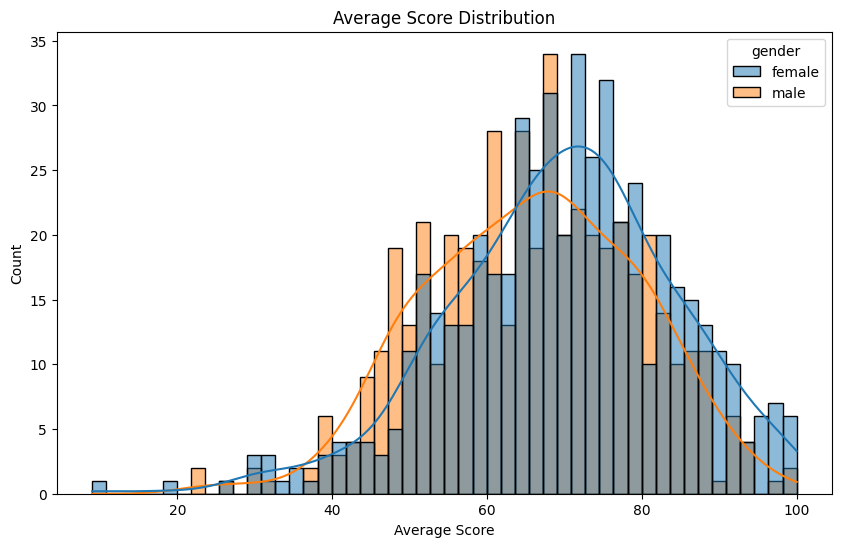

In [24]:
# plotting the average score based on gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='average',bins=50,hue='gender',kde=True)
plt.title('Average Score Distribution')
plt.xlabel('Average Score')
plt.show()

Girls are ahead in terms of average marks in all the subjects.

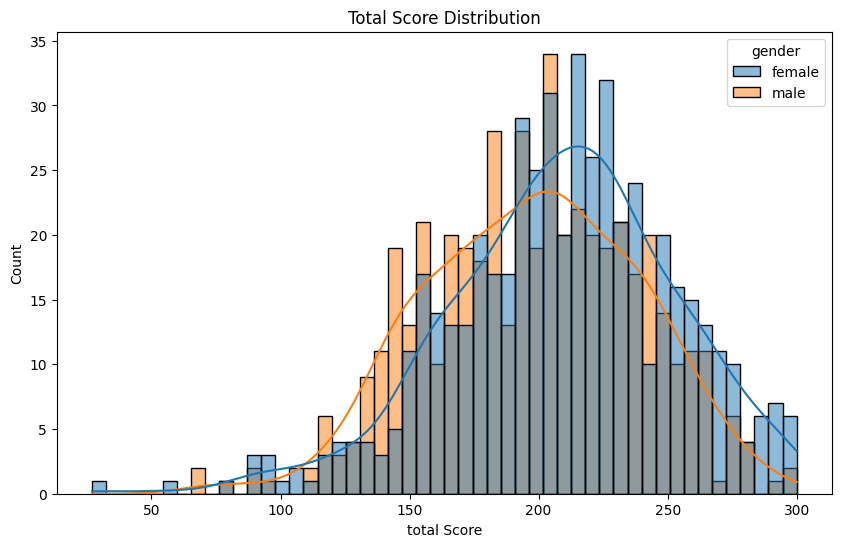

In [25]:
# plotting the total score based on gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='total_score',bins=50,hue='gender',kde=True)
plt.title('Total Score Distribution')
plt.xlabel('total Score')
plt.show()

Females are performing well in this record

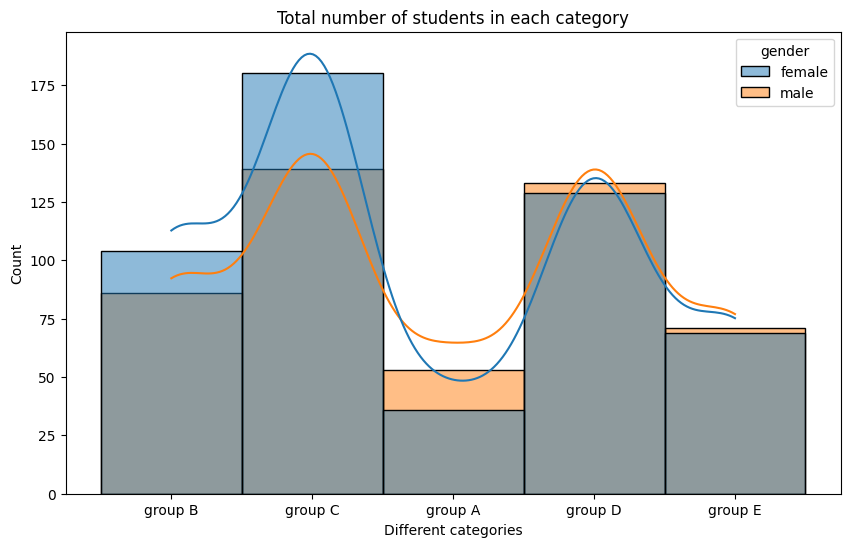

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='race_ethnicity',hue='gender',kde=True)
plt.title('Total number of students in each category')
plt.xlabel('Different categories')
plt.show()

Frequency of students is high in group c or section c.

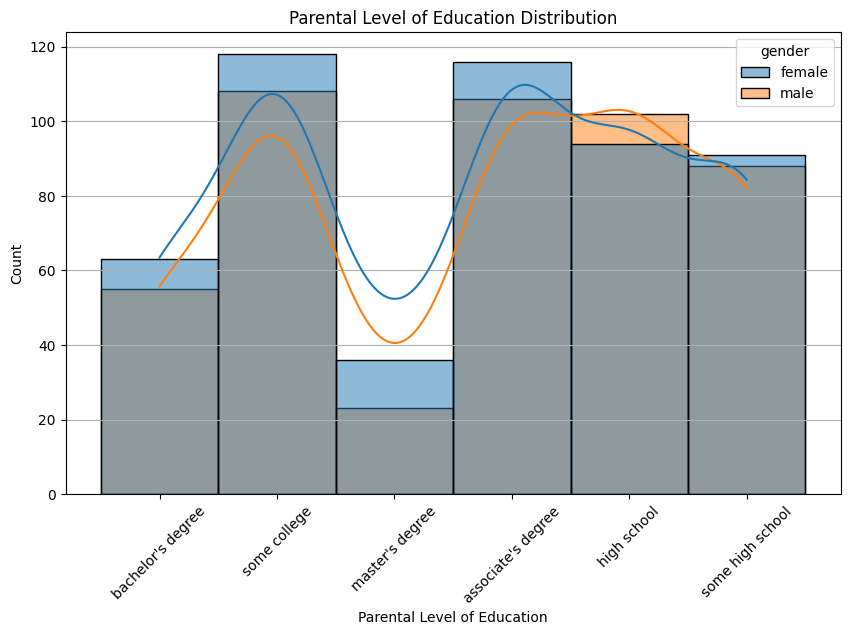

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='parental_level_of_education',hue='gender',kde=True)
plt.title('Parental Level of Education Distribution')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Maximum frequency in parents degree:- upto college and a degree.